# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

import warnings 
warnings.filterwarnings('ignore')


#pip install --upgrade seaborn
#pip install --upgrade matplotlib

# 2. Load the Data

In [2]:
data = pd.read_csv('/Users/aycan/Documents/Greenbootcamps04032024/DS_final_project/data/output.csv')

In [3]:
df = pd.DataFrame(data)

In [4]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df.head()

# 3. Split the Data

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.compose
import sklearn
import tabulate


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(['selling_price'], axis=1)
y = df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
print("Training set shape(df_train):", df_train.shape)
print("Testing set shape(df_test):", df_test.shape)

Training set shape(df_train): (5373, 13)
Testing set shape(df_test): (1344, 13)


# 4. Scaling and Encoding

In [8]:
#Standard Scaler and One Hot Encoder

numerical_attributes=X_train.select_dtypes(include=["float64","int64"]).columns
categorical_attributes=X_train.select_dtypes(include="object").columns

ct=sklearn.compose.ColumnTransformer(
    [("Standard_scaling",sklearn.preprocessing.StandardScaler(),numerical_attributes), 
     ("One_hot_encoding",sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"),
      categorical_attributes)])

ct.fit(X_train)
X_train=ct.transform(X_train)
X_test=ct.transform(X_test)
print("x_train :",X_train.shape)
print("x_test :",X_test.shape)

x_train : (5373, 244)
x_test : (1344, 244)


# 5.Model Building and Training

In [9]:
#Model Selection

#1 Linear Regression

#2 GradientBoostingRegressor

In [10]:
#1 Linear Regression

grid = {'fit_intercept': [True, False], 'copy_X': [True, False], 'n_jobs': [None, -1, 1, 2]    }

model1_linear = GridSearchCV(LinearRegression(), grid, scoring='r2', cv=5, n_jobs=-1)
model1_linear.fit(X_train, y_train)

print("R^2 score of the best Linear Regressions model: {:.3f}".format(model1_linear.best_score_))
print("Best hyperparameter of Linear Regressions model:", model1_linear.best_params_)

R^2 score of the best Linear Regressions model: 0.805
Best hyperparameter of Linear Regressions model: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None}


In [11]:
#2 GradientBoostingRegressor

grid = {"n_estimators": [150, 200, 250],"max_depth": [4,5,6],"learning_rate": [0.05, 0.1,0.2]
}
model2_boosting = GridSearchCV( estimator=GradientBoostingRegressor(), param_grid=grid, scoring="r2", cv=5)
model2_boosting.fit(X_train, y_train)

print("R^2 score of the best Gradient Boosting Regressor = {:.2f}".format(model2_boosting.best_score_))
print("Best hyperparameter of Gradient Boosting Regressor = {}".format(model2_boosting.best_params_))

R^2 score of the best Gradient Boosting Regressor = 0.91
Best hyperparameter of Gradient Boosting Regressor = {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 250}


In [12]:
#Gradient Boosting Regressor is better than Linear Regression

# 6. Model Evaluation

In [13]:
# Model Assessment

y_predicted = model2_boosting.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_predicted)

print("Root Mean Squared Error: {:.2f}".format(rmse))
print("Mean Absolute Error : {:.2f}".format(mae))
print("Mean Squared Error : {:.2f}".format(mse))
print("R^2 Score: {:.2f}".format(r2))

Root Mean Squared Error: 109875.13
Mean Absolute Error : 67633.53
Mean Squared Error : 12072545218.09
R^2 Score: 0.94


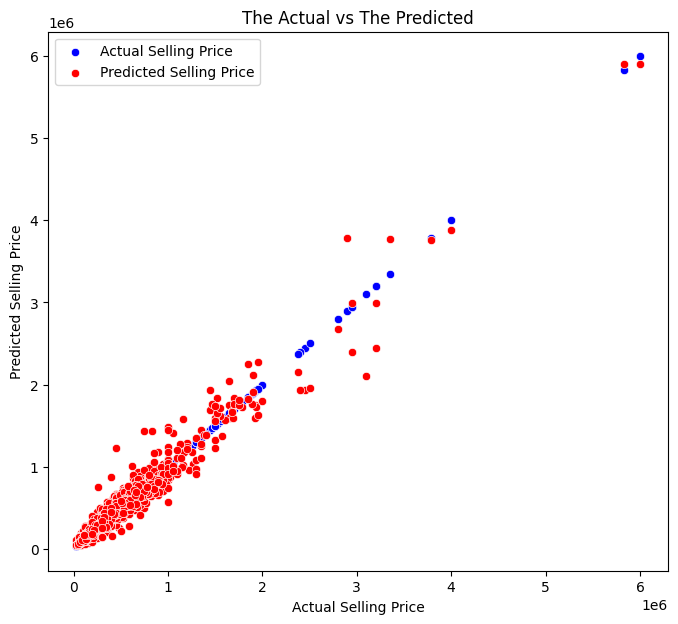

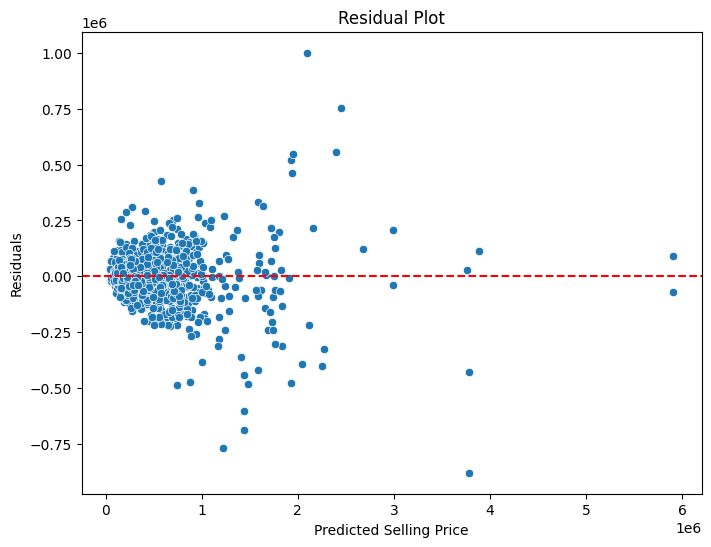

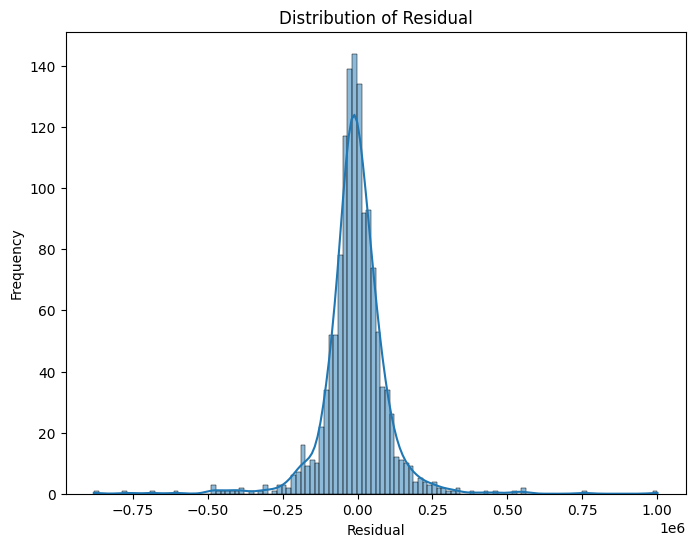

In [14]:

# Real selling prices (y_test) & estimated selling prices (y_predicted)
plt.figure(figsize=(8, 7))

# Plot actual selling prices in blue
sns.scatterplot(x=y_test, y=y_test, color='blue', label='Actual Selling Price')

# Plot estimated selling prices in red
sns.scatterplot(x=y_test, y=y_predicted, color='red', label='Predicted Selling Price')

plt.title('The Actual vs The Predicted')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.legend()
plt.show()

# Calculate residuals
residuals = y_test - y_predicted

# Residual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_predicted, y=residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Distribution of Residual
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residual')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()
